In [51]:
import yfinance as yf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [52]:
timePriod ="200d"

In [53]:

indexDict = {
    "Nifty Data": "^NSEI",
    "Sensex Data": "^BSESN",
    "Bank Nifty Data": "^NSEBANK",
    "IT Sector Data": "^CNXIT",
    "Auto Sector Data": "^CNXAUTO",
    "Metal Sector Data": "^CNXMETAL",
    "Realty Sector Data": "^CNXREALTY",
    "FMCG Sector Data": "^CNXFMCG",
    "Pharma Sector Data": "^CNXPHARMA",
    "Energy Sector Data": "^CNXENERGY",
    "Gold Data": "GC=F",
    "Crude Oil Data": "CL=F",
    "USD-INR Data": "INR=X",
    "India VIX Data": "^INDIAVIX"
}
dataDict = {}

In [54]:
# the index and data finding
for name , symbol in indexDict.items():
    dataDict[name] = yf.Ticker(ticker=symbol).history(period=timePriod)

In [55]:
# the data shapes
for names , data in dataDict.items():
    print(f'{names} data shape : ', data.shape)


Nifty Data data shape :  (198, 7)
Sensex Data data shape :  (198, 7)
Bank Nifty Data data shape :  (197, 7)
IT Sector Data data shape :  (197, 7)
Auto Sector Data data shape :  (197, 7)
Metal Sector Data data shape :  (197, 7)
Realty Sector Data data shape :  (197, 7)
FMCG Sector Data data shape :  (197, 7)
Pharma Sector Data data shape :  (197, 7)
Energy Sector Data data shape :  (197, 7)
Gold Data data shape :  (164, 7)
Crude Oil Data data shape :  (164, 7)
USD-INR Data data shape :  (197, 7)
India VIX Data data shape :  (197, 7)


In [56]:
dataDict['IT Sector Data'].tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2026-01-05 00:00:00+05:30,38222.000000,38260.851562,37365.898438,37771.148438,22000,0.0,0.0
2026-01-06 00:00:00+05:30,37712.050781,38053.101562,37680.699219,37977.398438,16600,0.0,0.0
2026-01-07 00:00:00+05:30,37951.300781,38736.800781,37940.851562,38688.800781,25100,0.0,0.0
2026-01-08 00:00:00+05:30,38686.550781,38728.648438,37853.750000,37920.300781,24900,0.0,0.0
2026-01-09 00:00:00+05:30,37861.250000,38244.550781,37861.148438,38027.199219,20800,0.0,0.0


In [57]:
# finding the null values
for names ,data in dataDict.items():
    display(f'{names} the data : ', data.isnull().sum())

'Nifty Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'Sensex Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'Bank Nifty Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'IT Sector Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'Auto Sector Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'Metal Sector Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'Realty Sector Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'FMCG Sector Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'Pharma Sector Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'Energy Sector Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'Gold Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'Crude Oil Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'USD-INR Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

'India VIX Data the data : '

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [58]:
# finding the null values
for names ,data in dataDict.items():
    data.dropna()
dataDict.__len__()

14

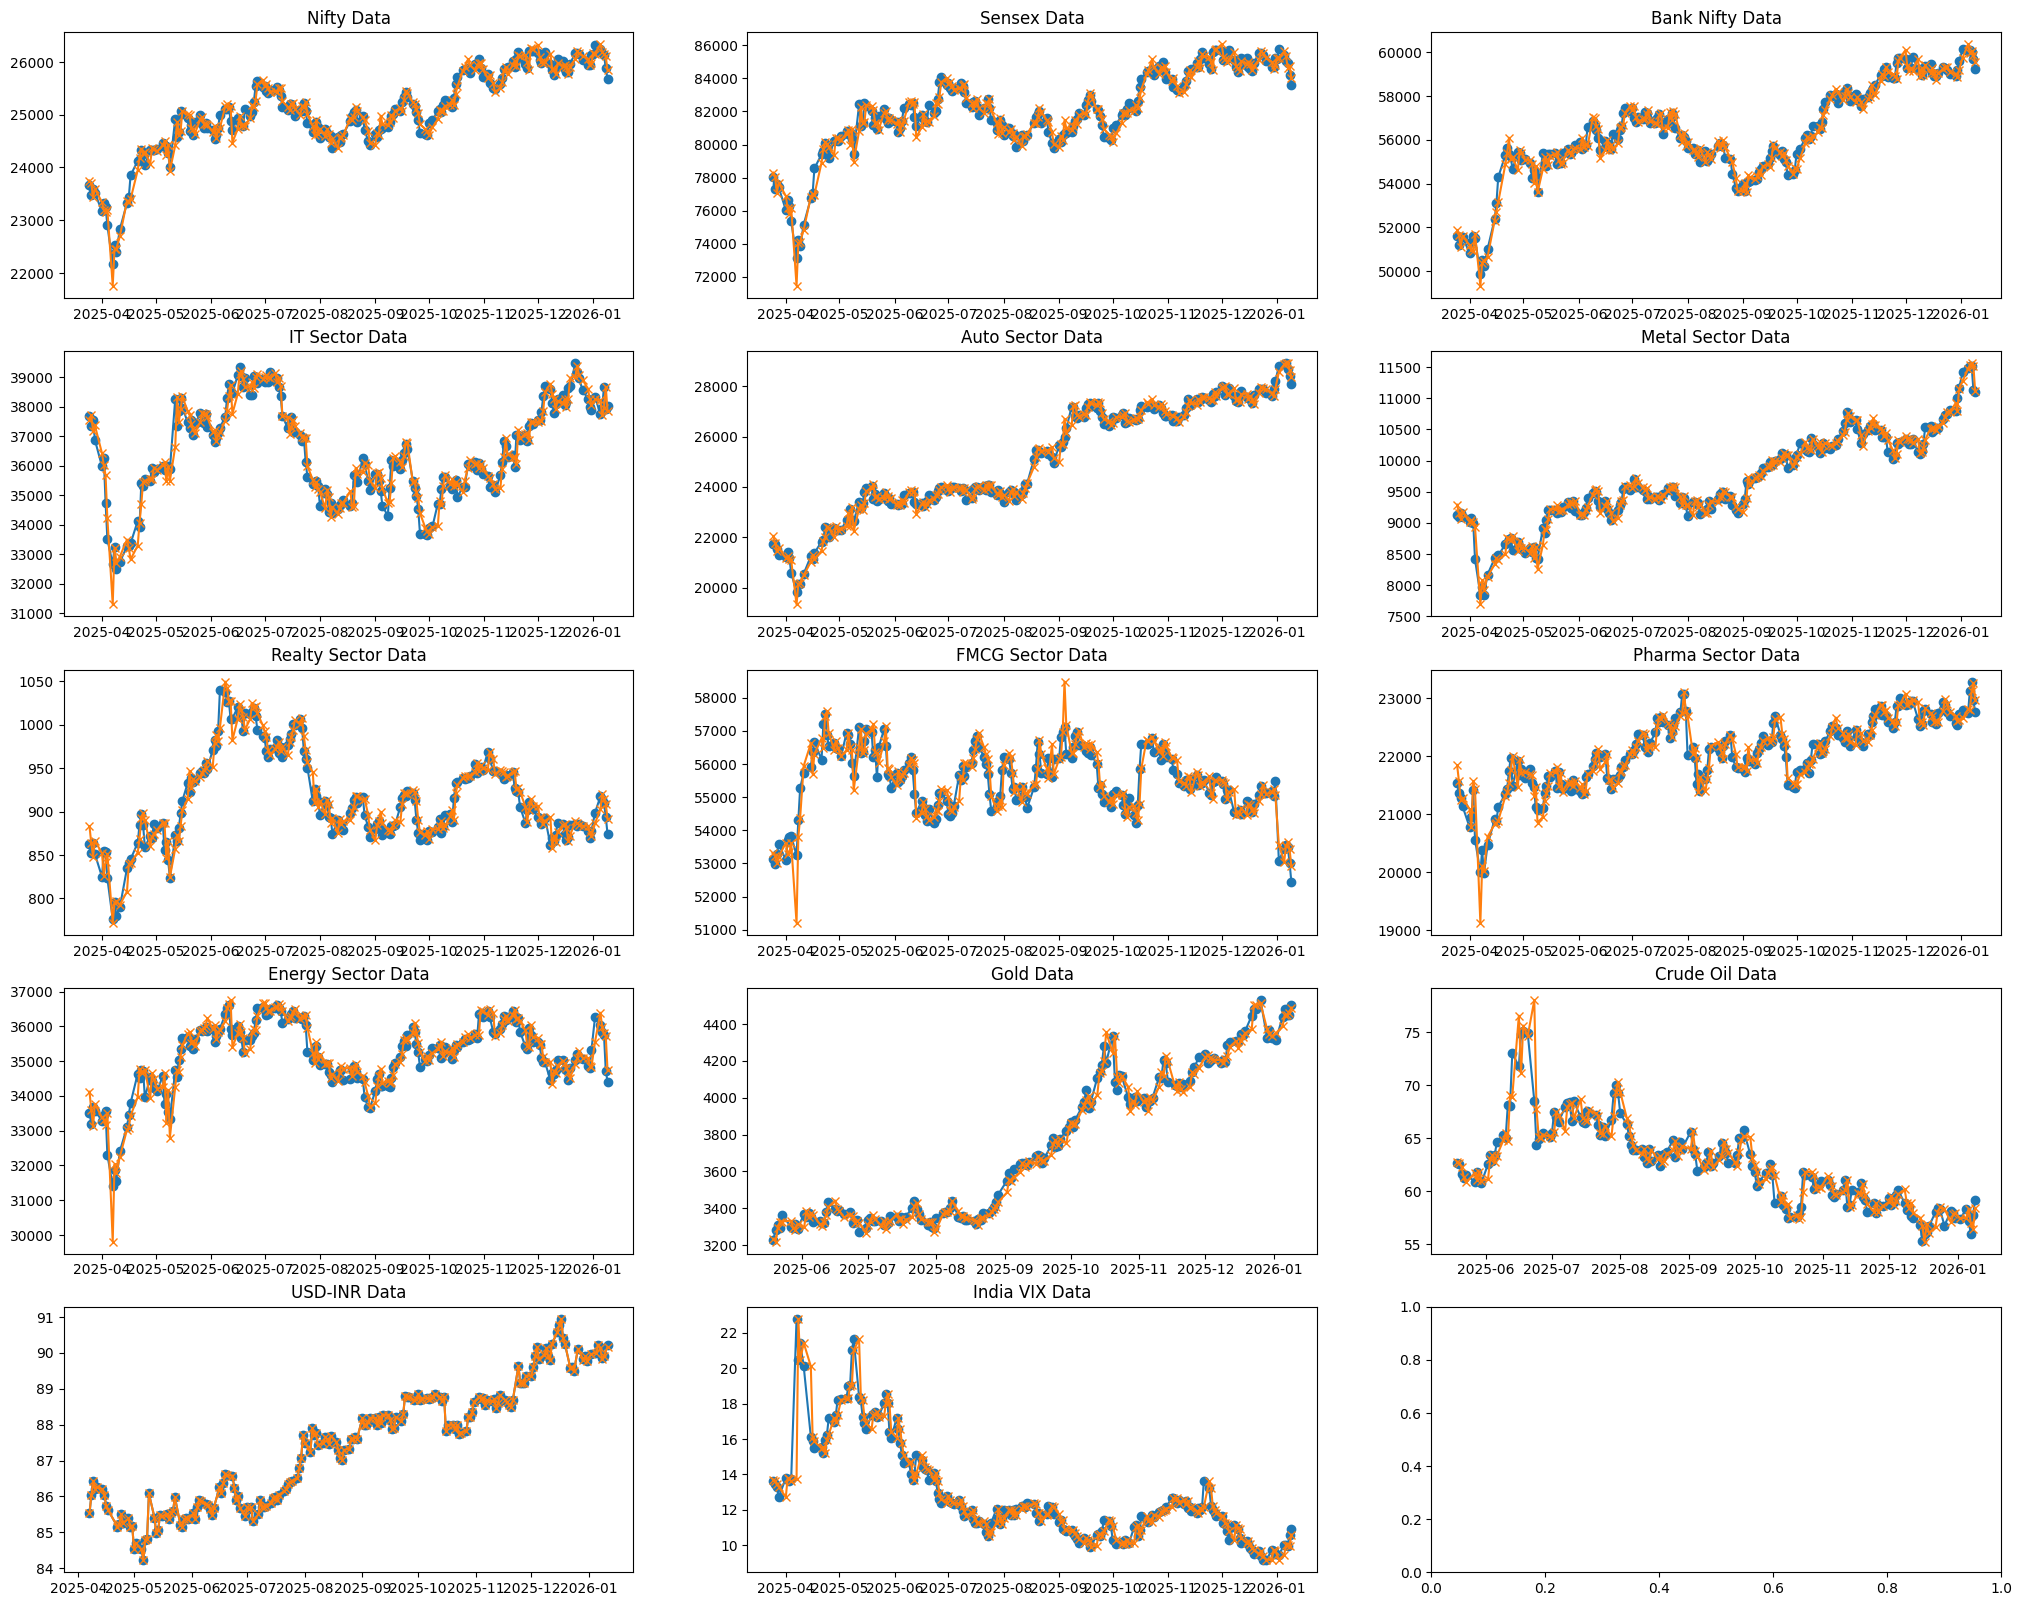

In [59]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25, 20))

for ax, (key, values) in zip(axes.flatten(), dataDict.items()):
    ax.plot(values['Close'], '-o')
    ax.plot(values['Open'],'-x')
    ax.set_title(key)
plt.show()



In [60]:
#momentum
rollingDays = 40
niftyMomentum = ((
    dataDict['Nifty Data']['Close'].iloc[-1] - 
    dataDict['Nifty Data']['Close'].iloc[-rollingDays]
) / dataDict['Nifty Data']['Close'].iloc[-rollingDays]
)*100

In [61]:
niftyMomentum 

np.float64(-0.8751430165628595)

In [64]:
print(dataDict['Nifty Data']['Close'].iloc[-1])
print(dataDict['Nifty Data']['Close'].iloc[-20])
print(dataDict['Nifty Data']['Close'].iloc[0])

25683.30078125
26046.94921875
23668.650390625
